**<Team 4>**

- 김용호
- 박철준
- 우현
- 전성재

# 문제 정의
**본 프로젝트는 어떤 스탯들이 축구선수의 이적료(몸값)과 관련이 있는지를 알아보기 위해 축구선수 이적료 및 여러 경기와 관련된 지표들을 크롤링하고, 테이블을 병합하여 특정 지표와 이적료 간의 관계를 시각화하여 인사이트를 도출하는 것을 목표로 함.**

# 분석 동기 및 이유
- 유럽축구 이적시장은 매년 여름마다 찾아오는 빅 이벤트!
- 2017년도 네이마르의 이적료 3천억원 규모의 PSG(파리생제르망) 이적은 세상을 놀라게 하기에 충분했다.
- 손흥민 선수의 몸값이 최근 1300억원(1억 유로)까지 뛰면서 선수들의 몸값과 이적료에 대한 축구팬들의 관심은 날이 갈수록 높아지는 중이다.

그렇다면, 선수들의 이적료는 어떤 기준으로 산정되고 있으며, 선수들간의 이적료 차이는 실제 경기 스탯과 어떠한 관련이 있는지 살펴보도록 하자!

## 4팀에서 가정한 여러 전제들은 다음과 같다.

 > 1. 어떤 팀에서 어떤 팀으로 이적하는지는 실제 이적료와는 관련이 있지만, 이적료를 예측하려는 것이 최종 목표이기 때문에 이적 전후의 팀에 대한 정보는 배제하도록 한다.
2. 포지션별로 큰 상관관계를 가지는 스탯은 다를 것이다. 다만, 이번 프로젝트에서는 이 가설은 배제하고 포지션 관계없이 모든 지표를 크롤링하는 것을 전제로 한다.
3. 이적에 영향을 미치는 스탯은 직전 3년간의 연평균 스탯과 가장 관련이 높을 것이다.
4. **각 설명변수들은 독립변수로 가정한다.**

## 변수 리스트

우선, 축구팬의 입장에서 이적료에 영향을 끼칠 것 같은 각종 스탯들을 대략적으로 정리해보았다.

### 종속변수

- 이적료

### 설명변수

<구조변수(Categorical parameter)>

- 포지션
- 좌/우/중앙
- 나이
- 키
- 몸무게

<이산변수(Numerical parameter)>

- 인기도 (트위터 검색량 등)
- 골
- 도움
- 슈팅수
- 유효슈팅비율
- 경기당 피파울수
- 경기당 드리블 성공횟수
- 드리블 성공률
- 패스성공률
- 전진패스 성공률
- 롱패스 성공률
- 경기당 키패스 횟수
- 최고 스프린트 속도
- xG값
- 패킷지수
- 활동량
- 태클성공률
- 경기당 클리어링 횟수
- 경기당 차단횟수
- 공중볼 경합 승률
- 경고수
- 퇴장수
- 직전 팀에서의 연봉(수집하기 어려움)
- 경기 출전수
- 경기 출전 시간
- 파울수
- 패널티킥골수

# 타임라인

## 화요일(9/13)

1. 주제선정 : 각종 경기 지표를 통한 축구선수 이적료 추정
2. 수집계획 선정
  1. 설명변수 리스트 정리
  2. 해외 경기스탯 관련 사이트 리서치
  3. 구글 및 트위터 API 리서치
3. 데이터 수집을 위한 가설 설정
4. 사이트별 크롤링 역할 분배
5. 데이터 통합 방식 선정

## 수요일(9/14)

- 각자 맡은 사이트 크롤링
- 크롤링하면서 겪은 문제 및 해결과정(회고록) 기록

## 목요일(9/15)

1. 데이터 수집 및 병합
2. 데이터 분석 방향 설정
3. 데이터 시각화
4. EDA(인사이트 도출)
5. 발표
6. 보고서 작성(with Jupyter Notebook & Notion)

# 과정 설명

## 축구 선수 이적료 및 데이터 수집과정

### transfermarkt.com의 선수별 이적료
><a href='https://www.transfermarkt.com/'>transfermarkt</a> : 2000년 5월에 마티아스 자이델(Matthias Seidel)에 의해 개설된 독일의 축구 이적 정보 전문 사이트

세계 최대의 이적 관련 정보 통계사이트로, 많은 축구팬들이 트랜스퍼마크트 측에서 책정하는 선수 몸값 추정치와 이적 뉴스 및 루머, 혹은 특정 선수의 프로필을 확인하기 위해 이 사이트를 이용하고 있다.

그렇기 때문에 모든 축구선수의 이적 건에 대한 정보를 가지고 있어 **트랜스퍼마크트의 이적 1건을 전체 데이터 테이블 row의 기준**으로 삼기로 했다.

### whoscored.com의 선수별 경기스탯
><a href='https://www.whoscored.com/'>후스코어드</a> : 500개 이상의 대회의 15,000개 이상의 팀, 250,000명 이상의 선수가 기재되어 있는 세계 최대의 축구 전문 통계 사이트

다만 이 사이트에서 활용하는 통계치는 후스코어드가 직접 계산한 것이 아니라 **옵타스포츠**(Opta, B2B 스포츠 데이터기업으로 해외축구 데이터는 90% 이상이 Opta 통계라고 보면 된다)의 통계를 인용한 것이다.

실시간으로 수많은 대회들에 대해 경기 시간에 맞춰 빠르게 통계를 집계하고 자체 랭킹을 매긴다. 경기가 종료되면 약간의 시간 동안 점수를 조금 더 조정하고 가장 높은 점수를 가진 선수에게 이 날의 선수(**MoTM**, Man of the Match)를 부여한다.

스탯을 가지고 자체적으로 선수의 점수를 매기는 업체이기 때문에 선수들에 대한 많은 스탯들을 공개하는 편이기 때문에 크롤링 타겟 사이트로 삼게 되었다.

### FBref의 경기 세부스탯

><a href='https://fbref.com/en/'>FBref</a> : 국내에서는 거의 관련 검색결과가 없을 정도로 잘 알려지지 않은 축구통계사이트

평소에 축구통계사이트를 많이 방문했지만, 이번 기회에 처음 접하게 된 사이트다.

UI가 굉장히 투박한 사이트지만, 정말 방대한 양의 데이터가 축적되어 있다.
공수 전반의 모든 세부지표가 149개로 지금껏 봤던 사이트 중 가장 많은 지표를 다루는 사이트로 보인다.

다만, 신생사이트라 그런지 17/18 시즌 이후의 데이터만 존재하여 약간의 아쉬움은 남는다.

### Google Trend 검색량(선수 인기도)

><a href='https://trends.google.com/trends/?geo=KR'>구글트랜드</a> : 구글에서 서비스 중인 검색어 및 시청 동영상 기반 빅데이터 분석 서비스이다.

시간 흐름에 따른 관심도 변화를 볼 수 있으며, 키워드간 시간별 관심도를 비교할 수 있다.

구글트랜드에서는 pytrends라는 파이썬 API를 제공해주어 동일 기간 키워드별 관심도를 수치적으로 비교할 수 있어 **인기도의 척도**로 활용하기 최적이라고 판단했다.

## 데이터 수집과정 문제 및 해결과정

### Squawka

선수 스탯비교 분야에서는 가장 유명한 사이트다.
공격, 패스, 수비, 세이브 분야의 세부 지표의 총 개수가 100개가 넘을 정도로 엄청난 양의 데이터를 가지고 있는 사이트다.
Opta Provision이라는 옵타스포츠에서 제공하는 가장 비싼 데이터를 사용하기 때문에 그렇다.

또한, 한국 IP를 막아버린 사이트로 유명하다.
이유는 아마 한국인들이 미친듯이 크롤링을 해가서 그렇지 않을까 싶다.
이를 해결하기 위해 많은 방법을 동원했다.
        
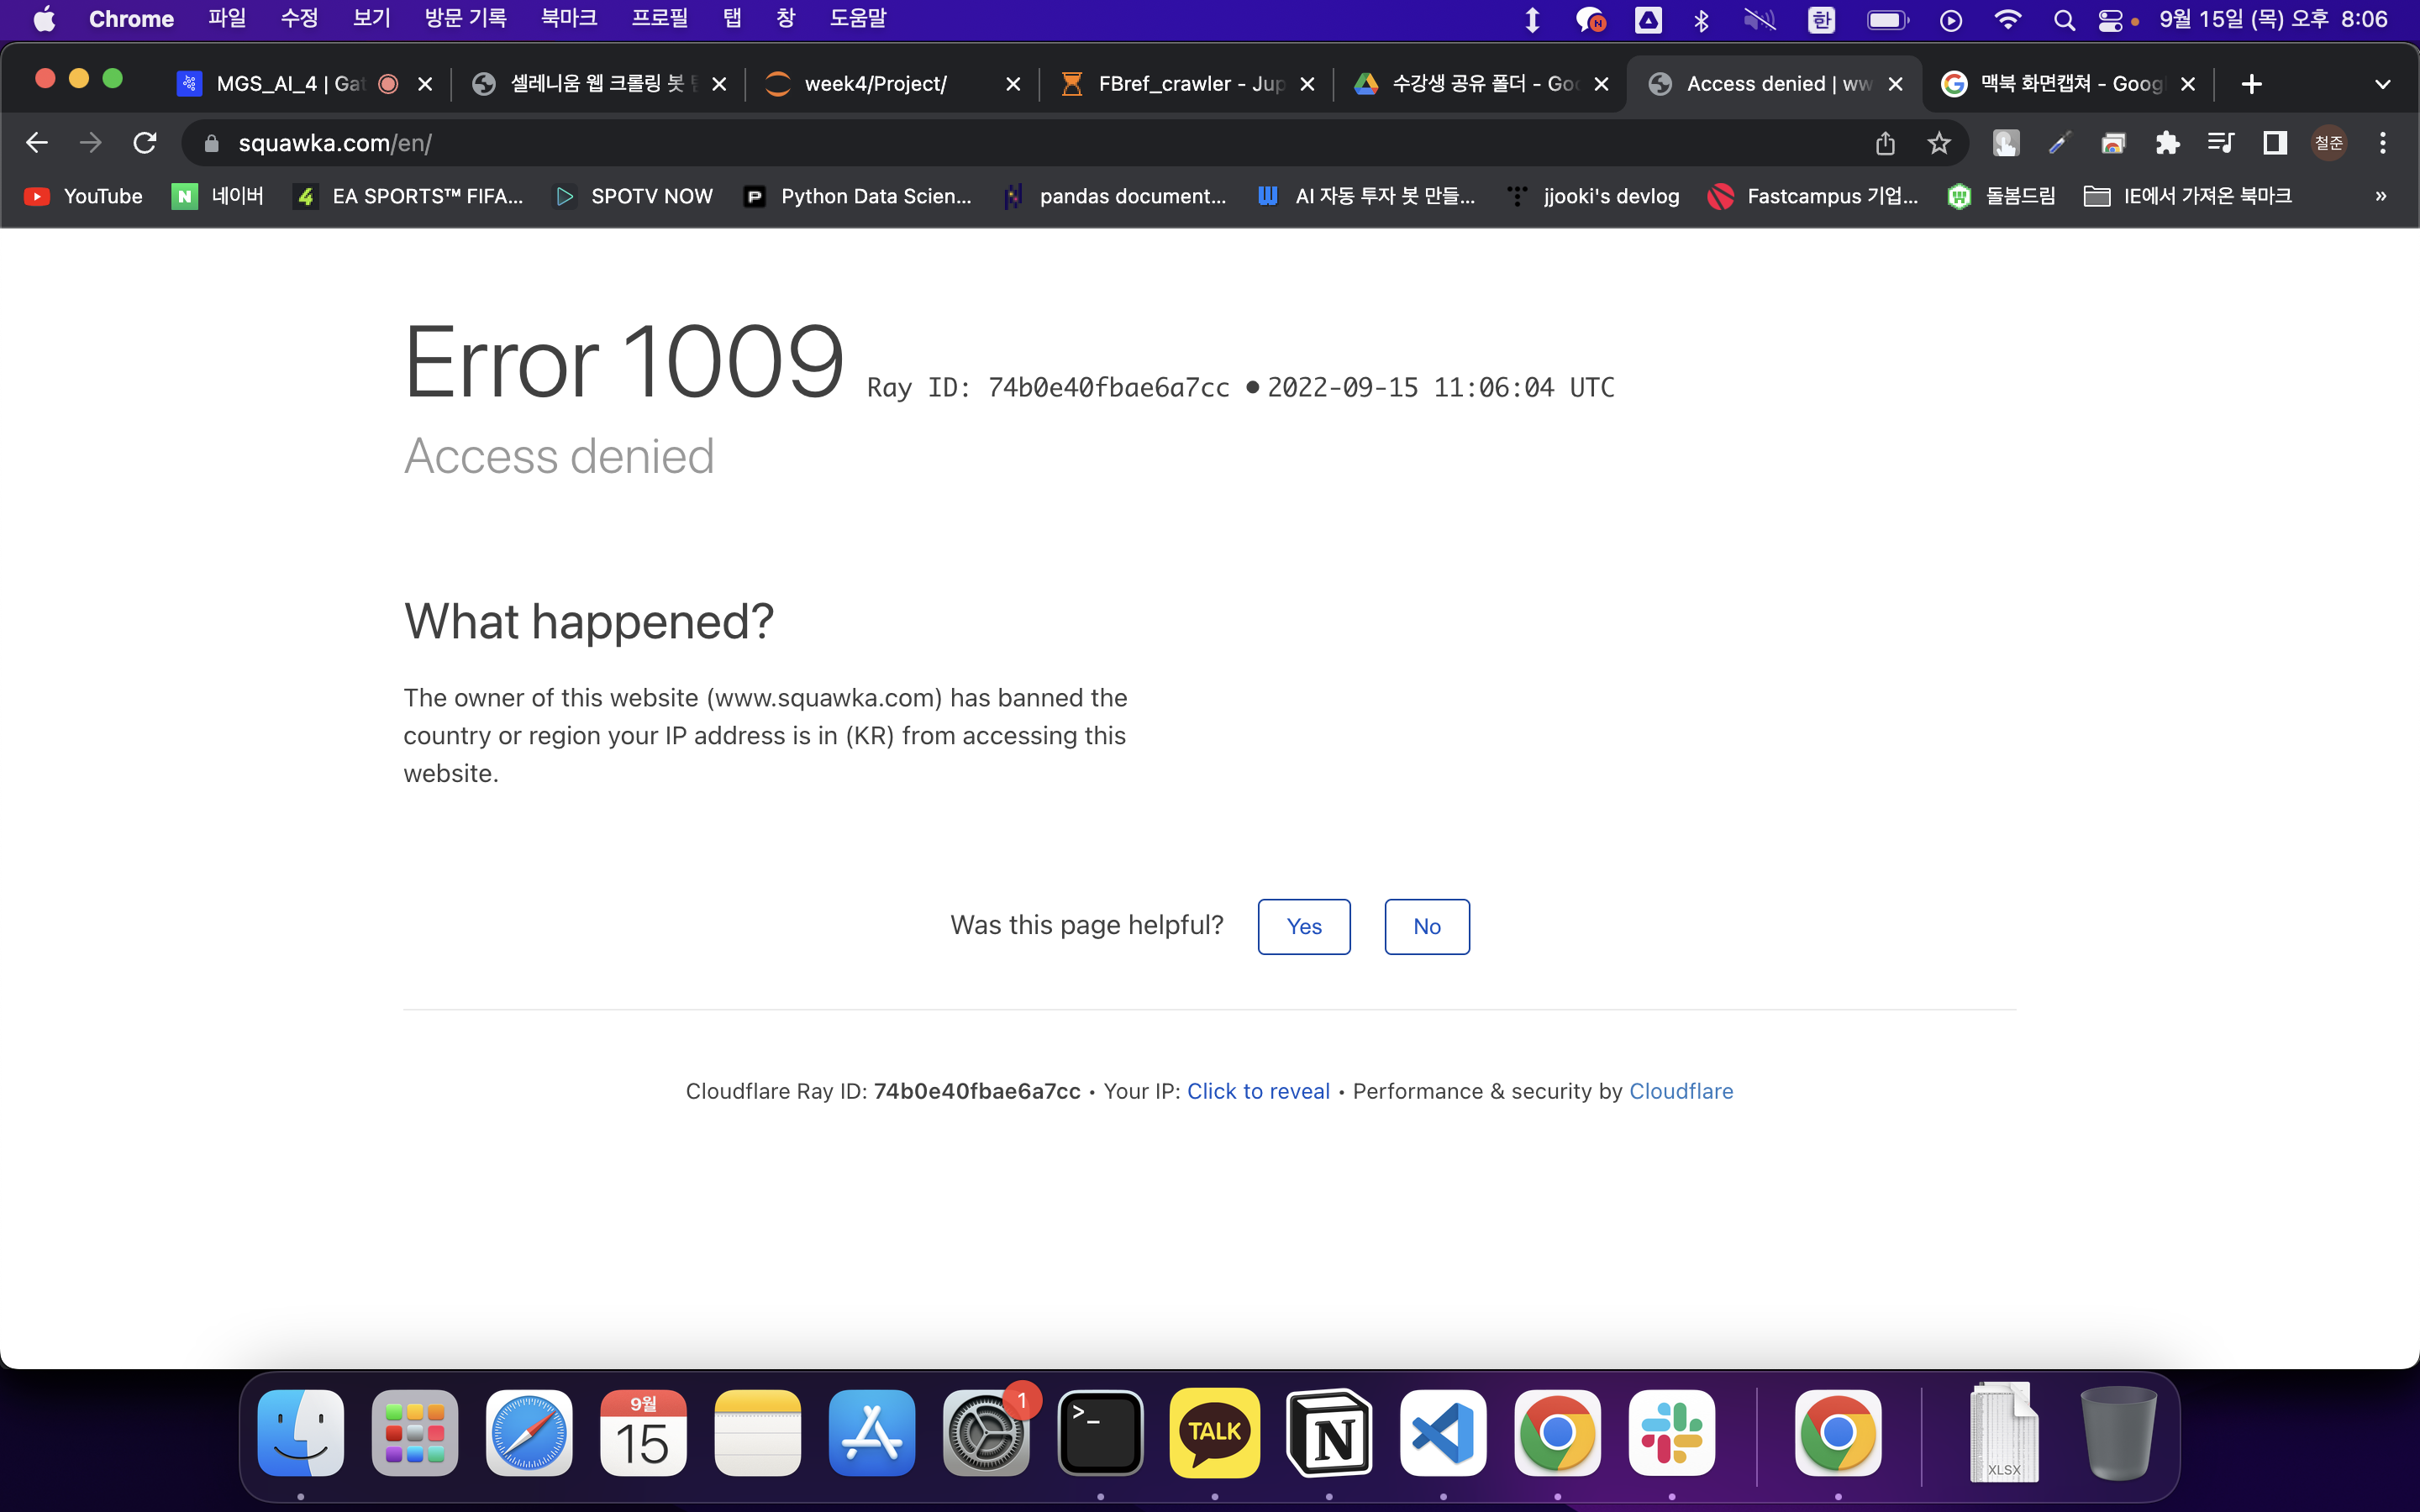
1. RandomProxy 오픈소스 라이브러리 도입
  1. 실패이유 : request 실패
  2. 소스코드를 다 뒤져봤지만, 에러라인을 타고 들어가도 뭐가 문제인지 알기가 어려움
  3. stackoverflow : python IDLE로 실행하면 된다는 글을 보고 시도해봤지만 실패!
2. Scrapy 활용
  1. IP 밴을 뚫는데 실패
  2. 1시간 이상을 구글링해서 모든 방법을 동원했지만, 원인과 해결책을 찾을 수 없었음…
3. Tor + Selenium으로 해결 시도
  1. Tor Proxy server를 타고 들어가서 접속하는 방식
  2. IP 밴을 뚫는데 드디어 성공!
  3. But, 봇 감지라는 새로운 문제 등장… :
  4. 봇 감지도 뚫어야 하는 미션
  5. 아래와 같은 코드를 통해 proxy 우회접속을 할 수 있다.

```python
def selenium_driver():
options = webdriver.ChromeOptions()
options.add_argument("--proxy-server=socks5://127.0.0.1:9150")
options.add_argument('window-size=1920x1080')
options.add_argument('disable-gpu')
options.add_experimental_option('excludeSwitches', ['enable-logging'])
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
return driver

url = 'https://www.squawka.com/en/comparison-matrix/'
driver = selenium_driver()
```

4. 봇 감지 문제
  1. fake user-agent
  2. referer 수시 변경
  3. options.add_argument & add_experimental_option을 통해 디버깅 모드 접속 시도
5. 결과 : **FBref 라는 통계사이트로 타겟 사이트를 변경**

### FBref
1. 셀레니움 활용
    1. 셀레니움만 활용했을 때 시즌별 스카우팅 리포트 버튼 클릭시 원인불명의 문제발생
    2. 같은 페이지라도 어쩔 땐 동작하고 어쩔땐 안되는 황당한 케이스
    3. 태그문제는 아니라는 것이 개별테스트로 밝혀짐
        1. 해결불가 판단으로 각 버튼태그에 숨겨져 있던 href를 찾아서 링크를 직접 requests.get하여 접근
2. 셀레니움 + 뷰티풀숩
    1. 문제: 셀레니움으로 시즌별 스카우팅 리포트페이지 접근시 에러 발생
        1. 선수페이지와 스카우팅리포트 페이지간 패턴이 있어서 다행히 스카우팅리포트까지는 접근이 잘됨
        2. 시즌별 스카우팅리포트 접근에 있어서 셀레니움으로의 접근은 어렵다고 판단하여 여기서부터는 beautifulsoup을 활용하여 스텟 표 데이터를 긁어옴
    2. 문제: 엘링홀란드 케이스에서 21시즌 혼자 테이블 컬럼이 1개 부족하여 concat시 에러 발생[indexerror]
        1. 이로인해 시리즈를 이어붙이고 ignore_index=True 옵션을 통해 이어붙인 후 데이터프레임에 붙일때만 transpose하고 index를 따로 붙여주는 방식 선택
    3. 문제: 김민재의 경우 아예 21시즌 이전 데이터가 존재하지 않아 기존 데이터프레임에 이어붙이는 작업시 에러가 뜨는 문제 발생[indexerror]
        1. 예외처리를 통해 해결
    4. **이처럼 잘 되는 것처럼 보여도 loop를 돌다보면 예상치 못한 에러들이 발생**
    5. 사이트에서 테이블을 일관되지 않게 만든 부분이 있다는 사실을 간과해서는 안된다는 점을 배우게 되었음

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

import time
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import os

INDEX = ['Name', 'Season', 'Goals', 'Assists', 'Non-Penalty Goals', 'Penalty Kicks Made', 'Penalty Kicks Attempted', 'Yellow Cards',
         'Red Cards', 'xG', 'Non-Penalty xG', 'xG Assisted', 'npxG + xA', 'Goals', 'Shots Total', 'Shots on target', 'Shots on target %',
         'Goals/Shot', 'Goals/Shot on target', 'Average Shot Distance', 'Shots from free kicks', 'Penalty Kicks Made',
         'Penalty Kicks Attempted', 'xG', 'Non-Penalty xG', 'npxG/Sh', 'Goals - xG', 'Non-Penalty Goals - npxG', 'Passes Completed',
         'Passes Attempted', 'Pass Completion %', 'Total Passing Distance', 'Progressive Passing Distance', 'Passes Completed (Short)',
         'Passes Attempted (Short)', 'Pass Completion % (Short)', 'Passes Completed (Medium)', 'Passes Attempted (Medium)',
         'Pass Completion % (Medium)', 'Passes Completed (Long)', 'Passes Attempted (Long)', 'Pass Completion % (Long)', 'Assists',
         'xG Assisted', 'Key Passes', 'Passes into Final Third', 'Passes into Penalty Area', 'Crosses into Penalty Area', 'Progressive Passes',
         'Passes Attempted', 'Live-ball passes', 'Dead-ball passes', 'Passes from Free Kicks', 'Through Balls', 'Passes Under Pressure',
         'Switches', 'Crosses', 'Corner Kicks', 'Inswinging Corner Kicks', 'Outswinging Corner Kicks', 'Straight Corner Kicks', 'Ground passes',
         'Low Passes', 'High Passes', 'Passes Attempted (Left)', 'Passes Attempted (Right)', 'Passes Attempted (Head)', 'Throw-Ins taken',
         'Passes Attempted (Other)', 'Passes Completed', 'Passes Offside', 'Passes Out of Bounds', 'Passes Intercepted', 'Passes Blocked',
         'Shot-Creating Actions', 'SCA (PassLive)', 'SCA (PassDead)', 'SCA (Drib)', 'SCA (Sh)', 'SCA (Fld)', 'SCA (Def)', 'Goal-Creating Actions',
         'GCA (PassLive)', 'GCA (PassDead)', 'GCA (Drib)', 'GCA (Sh)', 'GCA (Fld)', 'GCA (Def)', 'Tackles', 'Tackles Won', 'Tackles (Def 3rd)',
         'Tackles (Mid 3rd)', 'Tackles (Att 3rd)', 'Dribblers Tackled', 'Dribbles Contested', '% of dribblers tackled', 'Dribbled Past',
         'Pressures', 'Successful Pressures', 'Successful Pressure %', 'Pressures (Def 3rd)', 'Pressures (Mid 3rd)', 'Pressures (Att 3rd)',
         'Blocks', 'Shots Blocked', 'Shots Saved', 'Passes Blocked', 'Interceptions', 'Tkl+Int', 'Clearances', 'Errors', 'Touches',
         'Touches (Def Pen)', 'Touches (Def 3rd)', 'Touches (Mid 3rd)', 'Touches (Att 3rd)', 'Touches (Att Pen)', 'Touches (Live-Ball)',
         'Dribbles Completed', 'Dribbles Attempted', 'Successful Dribble %', 'Players Dribbled Past', 'Nutmegs', 'Carries', 'Total Carrying Distance',
         'Progressive Carrying Distance', 'Progressive Carries', 'Carries into Final Third', 'Carries into Penalty Area', 'Miscontrols',
         'Dispossessed', 'Pass Targets', 'Passes Received', 'Passes Received %', 'Progressive Passes Rec', 'Yellow Cards', 'Red Cards',
         'Second Yellow Card', 'Fouls Committed', 'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles Won', 'Penalty Kicks Won',
         'Penalty Kicks Conceded', 'Own Goals', 'Ball Recoveries', 'Aerials won', 'Aerials lost', '% of Aerials Won']

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver

def subtract_url(html):
    dc = {}
    for item in html.select('div.filter div'):
        try:
            url = item.find('a')['href']
            season = item.find('a').text[:4]
            if season in ['2021','2020', '2019', '2018', '2017']:
                dc.update({season : 'https://fbref.com/' + url})
        except:
            continue
    return dc

whoscored = pd.read_excel("./whoscored.xlsx")
players = whoscored['Name'].tolist()

url = "https://fbref.com/en"
driver = set_chrome_driver()
driver.maximize_window()
driver.get(url)
df = pd.DataFrame()
start = time.time()

[WDM] - Downloading:  87%|████████████████████████████████████████████████▌       | 5.80M/6.68M [00:00<00:00, 11.7MB/s]

In [7]:
for player in players:
    now = time.time()
    #시간제한
#     if (now - start) > 3600:
#         break
    
    time.sleep(np.random.randint(3))
    driver.find_element(By.XPATH, '//*[@id="header"]/div[3]/form/div/div').click()
    driver.find_element(By.XPATH, '//*[@id="header"]/div[3]/form/div/div/input[2]').send_keys(player)
    driver.find_element(By.XPATH, '//*[@id="header"]/div[3]/form/div/div/input[2]').send_keys(Keys.DOWN)
    driver.find_element(By.XPATH, '//*[@id="header"]/div[3]/form/div/div/input[2]').send_keys(Keys.ENTER)
    sub_url = driver.current_url[:-len(driver.current_url.split('/')[-1])] + "scout/365_euro/" + driver.current_url.split('/')[-1] + "-Scouting-Report"
    driver.get(sub_url)
    #4~8
    resp = requests.get(driver.current_url)
    html = BeautifulSoup(resp.text, 'html.parser')
    
    df_stat = pd.DataFrame()
    select_num = 1
    url_dict = subtract_url(html)
    i = -1
    for season, season_url in url_dict.items():
        time.sleep(np.random.randint(3))
        
        resp = requests.get(season_url)
        html = BeautifulSoup(resp.text, 'html.parser')
#         column = [item.text for item in html.select('table.stats_table tbody tr th') if item.text not in ['', 'Statistic', 'Per 90', 'Percentile']]
#         column = column[:156]
#         index = ['Name', 'Season']
#         for col in column:
#             if col in INDEX:
#                 index.append(col)
        
        idx = -1
        i += 1
        stats = []
        stats.append(player)
        stats.append(season)
        for item in html.select('table.stats_table tbody tr td'):
            idx += 1
            stat = item.text.strip()
            if idx % 2 == 1:
                continue
            if stat != '':
                stats.append(stat)
        stats = stats[:len(INDEX)]
        
        sr = pd.Series(stats, name=str(i))
        df_stat = pd.concat([df_stat, pd.DataFrame(sr)], ignore_index=True, axis = 1)
    
    if len(df_stat.index) != len(INDEX):
        continue
    df_stat = df_stat.T
    df_stat.columns = INDEX
    df = df.append(df_stat, ignore_index=True)

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.68M/6.68M [00:17<00:00, 409kB/s]


KeyboardInterrupt: 

In [8]:
df

,Name,Season,Goals,Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG,...,Crosses,Interceptions,Tackles Won,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials won,Aerials lost,% of Aerials Won
0,Lionel Messi,2021,0.25,0.59,0.25,0.00,0.00,0.00,0.00,0.42,...,0.75,0.50,0.29,0.00,0.00,0.00,4.85,0.25,0.08,75.0%
1,Lionel Messi,2020,0.89,0.27,0.80,0.09,0.15,0.12,0.00,0.70,...,1.96,0.21,0.48,0.00,0.00,0.00,3.63,0.36,0.33,52.2%
2,Lionel Messi,2019,0.78,0.66,0.63,0.16,0.16,0.13,0.00,0.60,...,1.94,0.13,0.31,0.03,0.00,0.00,3.97,0.19,0.13,60.0%
3,Lionel Messi,2018,1.19,0.43,1.06,0.13,0.17,0.10,0.00,0.78,...,2.06,0.17,0.40,0.00,0.00,0.00,4.35,0.10,0.23,30.0%
4,Lionel Messi,2017,1.02,0.36,0.96,0.06,0.12,0.09,0.00,0.76,...,1.14,0.33,0.33,0.00,0.00,0.00,4.74,0.24,0.33,42.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Achraf Hakimi,2021,0.15,0.22,0.15,0.00,0.00,0.11,0.04,0.08,...,1.89,1.63,1.71,0.00,0.00,0.00,4.86,0.36,0.73,33.3%
251,Achraf Hakimi,2020,0.24,0.27,0.24,0.00,0.00,0.20,0.00,0.16,...,3.55,0.84,0.98,0.07,0.00,0.00,5.57,0.44,0.95,31.7%
252,Achraf Hakimi,2019,0.17,0.33,0.17,0.00,0.00,0.17,0.00,0.12,...,2.95,0.80,1.23,0.00,0.00,0.00,9.12,0.60,0.70,46.2%
253,Achraf Hakimi,2018,0.10,0.21,0.10,0.00,0.00,0.21,0.00,0.07,...,2.07,0.62,1.03,0.00,0.00,0.00,9.78,0.67,0.52,56.5%


### transfermarkt
    
<a href='https://drive.google.com/drive/folders/11GIkce5I6Xo8J2OJpQ2oTeXf3ziWWysM?usp=sharing'>코드원본링크</a>
    
- 동적 사이트 웹 크롤링 방식 활용
        
- 문제: 첫 시도 시 셀레니움을 사용하였으나 페이지 간 이동 시 로딩 시간이 길고, 페이지가 초기화   되어 시간이 많이 소요됨.
        
- 문제 해결 : 중첩 반복문과 동적 사이트 웹 크롤링 방식을 함께 사용하여 시즌, 선수, 나이, 이적료를 딕셔너리에 담고 딕셔너리를 데이터 프레임에 추가하는 방식으로 해결

### whoscored
    
<a href='https://drive.google.com/drive/folders/1bkZPBS97y9xROL4ROJSf4-xT7swKZfve?usp=sharing'>코드원본링크</a>
    
- 셀레니움을 사용하여 크롤링 
        
- 문제
  1. 첫 시도 시 transfermark와 같은 동적 사이트 웹 크롤링 방식을 적용하려 했으나, 요청 에러가 발생하여 해당 방식을 사용하지 못함.    
  2. 셀레니움을 사용하여 시도했을 때 페이지 선택, 선수 선택, 히스토리 탭 이동 등 페이지 전환이 많고 선수의 정보를 확인한 후 다시 리스트 페이지로 이동했을 때 페이지가 초기화 되었음.
        
        
- 문제 해결 : 선수 리스트가 있는 페이지로 이동했을 때 페이지가 초기화되는 것을 해결하기 위해 페이지에 있는 선수들의 페이지를 각각 새로운 탭으로 열고 탭의 리스트를 받아와 히스토리 정보를 크롤링 후 탭을 닫는 방식으로 해결함. 페이지를 다시 찾아가는 시간이 줄어 시간 단축됨.

## 이적료와 선수 정보 병합
    
<a href='https://docs.google.com/spreadsheets/d/1RcQqz71NgW2pB9aPiw2gmKIOurwVxmZz/edit?usp=sharing&ouid=115807618095562987152&rtpof=true&sd=true'>엑셀원본링크</a>

- pandas를 활용한 테이블 병합(join, concat, merge활용)

 : 이적료 정보가 담긴 데이터 프레임의 Season 값을 이용하여 선수 정보가 담긴 데이터 프레임에서 이적 이전 연도와 이적 이전 3년간의 정보를 추출 후 새로운 테이블을 구성

In [51]:
import pandas as pd
df = pd.read_excel("./fee_py_p3y.xlsx")
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
0,2018,Kylian Mbappé,Centre-Forward,19,180000,17,11,3,0,33,...,0.29,2.41,79.26,0.27,58,5189,39,21,6,0
1,2022,Erling Haaland,Centre-Forward,22,60000,30,7,3,0,30,...,1.35,3.31,70.38,1.28,86,7779,96,19,10,0
2,2019,Erling Haaland,Centre-Forward,19,20000,0,0,0,0,1,...,2.00,0.77,68.98,0.80,4,507,2,1,2,0
3,2018,Erling Haaland,Centre-Forward,18,8000,2,1,2,0,3,...,0.40,0.70,68.90,0.40,3,383,2,1,2,0
4,2016,Erling Haaland,Centre-Forward,16,100,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2021,José Sá,Goalkeeper,28,8000,0,0,0,0,10,...,0.00,0.00,56.87,0.36,26,2370,0,0,1,0
838,2019,José Sá,Goalkeeper,26,2500,0,0,0,0,7,...,0.10,0.00,71.47,0.27,30,2389,0,0,3,1
839,2015,José Sá,Goalkeeper,22,1200,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0


### 데이터 명세

항목 | 설명 |항목 | 설명 |항목 | 설명 |
:---------|:----------|:---------|:----------|:---------|:----------|
Season | 활동 연도 |Goals_py | 이적 이전 연도 골 수 |Goals_p3y | 이적 이전 3년간 골 수
Name | 선수 이름 | Assists_py | 이적 이전 연도 도움 수 | Assists_p3y | 이적 이전 3년간 도움 수
Position | 포지션 | Yellow_cards_py | 이적 이전 연도 경고 수 | Yellow_cards_p3y | 이적 이전 3년간 경고 수
Age | 나이 $\qquad$|Red_cards_py | 이적 이전 연도 퇴장 수 $\qquad$|Red_cards_p3y | 이적 이전 3년간 퇴장 수
Fee (€ 1Th) | 이적료 | Appearances_py | 이적 이전 연도 출전 횟수 | Appearances_p3y | 이적 이전 3년간 출전 횟수
 |  |Minutes_played_py | 이적 이전 연도 출전 분 수 |Minutes_played_p3y | 이적 이전 3년간 출전 분 수 
 |  |MotM_py | 이적 이전 연도 출전 분 수 |MotM_p3y | 이적 이전 3년간 출전 분 수 
 |  |SPG_py | 이적 이전 연도 경기당 슛 시도 |SPG_p3y | 이적 이전 3년간 경기당 슛 시도
 |  |PS%_py | 이적 이전 연도 패스 성공률 |PS%_p3y | 이적 이전 3년간 패스 성공률 
 |  |AerialsWone_py | 이적 이전 연도 공중전 승률 |AerialsWone_p3y | 이적 이전 3년간 공중전 승률 
 |  |  __총 항목수__| __25개__

**크롤링**을 통해 추가 데이터를 수집하기로 결정.

# 데이터 시각화를 통한 분석

## 데이터 살펴보기

### 이적료 분포 살펴보기

In [24]:
fee = pd.read_excel('./fee_py_p3y.xlsx')
fee = fee.drop('Unnamed: 0', axis=1)
fee

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
0,2018,Kylian Mbappé,Centre-Forward,19,180000,17,11,3,0,33,...,0.29,2.41,79.26,0.27,58,5189,39,21,6,0
1,2022,Erling Haaland,Centre-Forward,22,60000,30,7,3,0,30,...,1.35,3.31,70.38,1.28,86,7779,96,19,10,0
2,2019,Erling Haaland,Centre-Forward,19,20000,0,0,0,0,1,...,2.00,0.77,68.98,0.80,4,507,2,1,2,0
3,2018,Erling Haaland,Centre-Forward,18,8000,2,1,2,0,3,...,0.40,0.70,68.90,0.40,3,383,2,1,2,0
4,2016,Erling Haaland,Centre-Forward,16,100,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2021,José Sá,Goalkeeper,28,8000,0,0,0,0,10,...,0.00,0.00,56.87,0.36,26,2370,0,0,1,0
838,2019,José Sá,Goalkeeper,26,2500,0,0,0,0,7,...,0.10,0.00,71.47,0.27,30,2389,0,0,3,1
839,2015,José Sá,Goalkeeper,22,1200,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0


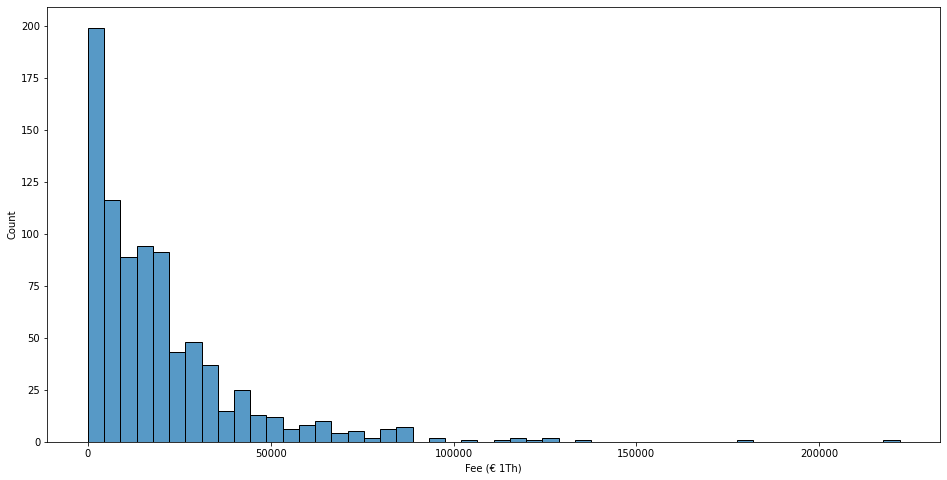

In [28]:
plt.figure(figsize=(16,8))
sns.histplot(fee['Fee (€ 1Th)'])
plt.show()

> 이적료 분포 : 우측으로 쏠린 k=1 카이제곱 분포

우리가 뉴스에서 접하는 거액의 이적료가 오가는 이적이 정말 희귀한 경우임을 이 그래프를 통해 알 수 있다.

또한, 포지션별로 중요하게 보는 스탯이 다르기 때문에 각 포지션별로도 table을 분리해서 정리해보기로 했다.

트랜스퍼마크트에서 분류한 포지션은 너무 세부적이어서 단순하게 공격수, 미드필더, 수비수, 골키퍼 4개의 포지션으로 묶어서 정리하였다.

In [25]:
pos = list(set(fee['Position'].tolist()))
print(pos)

['Left Midfield', 'Right Midfield', 'Right-Back', 'Central Midfield', 'Second Striker', 'Right Winger', 'Left-Back', 'Left Winger', 'Defensive Midfield', 'Goalkeeper', 'Centre-Back', 'Centre-Forward', 'Attacking Midfield']


In [64]:
FW, MF, DF = [], [], []
fw = [5,7,9,12]
mf = [2,3,4,6,8]
df = [0,1,10]
GK = ['Goalkeeper']

for i in fw:
    FW.append(pos[i])
for i in mf:
    MF.append(pos[i])
for i in df:
    DF.append(pos[i])

print(FW)
print(MF)
print(DF)

['Right Winger', 'Left Winger', 'Goalkeeper', 'Attacking Midfield']
['Right-Back', 'Central Midfield', 'Second Striker', 'Left-Back', 'Defensive Midfield']
['Left Midfield', 'Right Midfield', 'Centre-Back']


In [65]:
# Fancy indexing을 활용하여 테이블을 분리
FW_fee = fee.loc[fee['Position'].isin(FW)]
MF_fee = fee.loc[fee['Position'].isin(MF)]
DF_fee = fee.loc[fee['Position'].isin(DF)]
GK_fee = fee.loc[fee['Position'].isin(GK)]

### 통계 분석

In [99]:
fee.describe()

,Season,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,Minutes_played_py,MotM_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.00000,826.000000,826.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,2017.633017,21.690024,19867.179335,2.709026,1.706651,1.874109,0.085511,12.438242,1107.193587,1.090261,...,0.56867,0.664709,39.341114,0.585606,26.874109,2410.669834,5.947743,3.675772,4.157957,0.197150
std,3.129318,2.930445,22463.146344,5.611237,3.172141,2.871123,0.323189,15.551200,1373.439871,2.206665,...,0.89550,0.910634,39.385691,0.875359,36.458545,3241.126540,13.771004,7.064547,6.467148,0.540041
min,2003.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,20.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22.000000,14325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,48.620000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,23.000000,26375.000000,3.000000,2.000000,3.000000,0.000000,27.000000,2399.250000,1.000000,...,0.85250,1.200000,79.152500,0.860000,51.000000,4597.000000,5.000000,4.000000,6.000000,0.000000
max,2023.000000,36.000000,222000.000000,49.000000,27.000000,16.000000,3.000000,75.000000,6544.000000,15.000000,...,5.20000,6.290000,92.210000,5.200000,153.000000,13216.000000,149.000000,48.000000,36.000000,6.000000


### 포지션별 이적료 분포도
포지션별로 정리한 김에 각 포지션별 이적료 분포도도 확인해보았다.

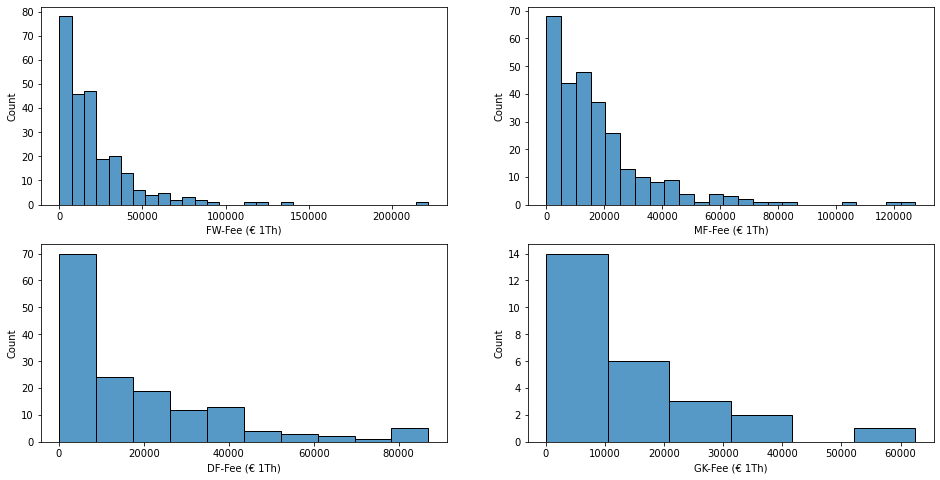

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(FW_fee['Fee (€ 1Th)'])
plt.xlabel('FW-Fee (€ 1Th)')
plt.subplot(2,2,2)
sns.histplot(MF_fee['Fee (€ 1Th)'])
plt.xlabel('MF-Fee (€ 1Th)')
plt.subplot(2,2,3)
sns.histplot(DF_fee['Fee (€ 1Th)'])
plt.xlabel('DF-Fee (€ 1Th)')
plt.subplot(2,2,4)
sns.histplot(GK_fee['Fee (€ 1Th)'])
plt.xlabel('GK-Fee (€ 1Th)')
plt.show()

전 포지션과 별 다를 것 없이 우측으로 쏠린 자유도 1짜리 카이스퀘어의 형태를 띄고 있다.

### 포지션별 이적료 평균, 표준편차 비교

In [30]:
print("FW의 평균 이적료는 €%.1fm 입니다." % (FW_fee.describe()['Fee (€ 1Th)']['mean']/1000))
print("MF의 평균 이적료는 €%.1fm 입니다." % (MF_fee.describe()['Fee (€ 1Th)']['mean']/1000))
print("DF의 평균 이적료는 €%.1fm 입니다." % (DF_fee.describe()['Fee (€ 1Th)']['mean']/1000))
print("GK의 평균 이적료는 €%.1fm 입니다." % (GK_fee.describe()['Fee (€ 1Th)']['mean']/1000))

FW의 평균 이적료는 €21.2m 입니다.
MF의 평균 이적료는 €18.3m 입니다.
DF의 평균 이적료는 €18.2m 입니다.
GK의 평균 이적료는 €14.4m 입니다.


In [31]:
print("FW의 이적료 표준편차는 €%.1fm 입니다." % (FW_fee.describe()['Fee (€ 1Th)']['std']/1000))
print("MF의 이적료 표준편차는 €%.1fm 입니다." % (MF_fee.describe()['Fee (€ 1Th)']['std']/1000))
print("DF의 이적료 표준편차는 €%.1fm 입니다." % (DF_fee.describe()['Fee (€ 1Th)']['std']/1000))
print("GK의 이적료 표준편차는 €%.1fm 입니다." % (GK_fee.describe()['Fee (€ 1Th)']['std']/1000))

FW의 이적료 표준편차는 €25.3m 입니다.
MF의 이적료 표준편차는 €19.1m 입니다.
DF의 이적료 표준편차는 €20.0m 입니다.
GK의 이적료 표준편차는 €14.8m 입니다.


>이적료 평균 : 공격수 > 미드필더 = 수비수 > 골키퍼

예상대로 일반적으로 공격수의 이적료가 가장 비싸고 골키퍼가 가장 싸다는 사실을 알 수 있다.

## 가설검증

### Season vs Fee
>시간이 지날수록 평균 이적료는 인플레이션에 의해 상승한다

실제 당대 최고의 스타였던 크리스티아노 호날두의 2009년 이적료가 1200억 정도였지만, 2017년 최고의 스타, 네이마르의 이적료는 2600억으로 이적료 거품이 꼈다는 논란이 일기도 했다.

이러한 경험적 가설이 맞는지 시즌 데이터와 이적료 데이터를 박스그래프를 통해 비교했다.


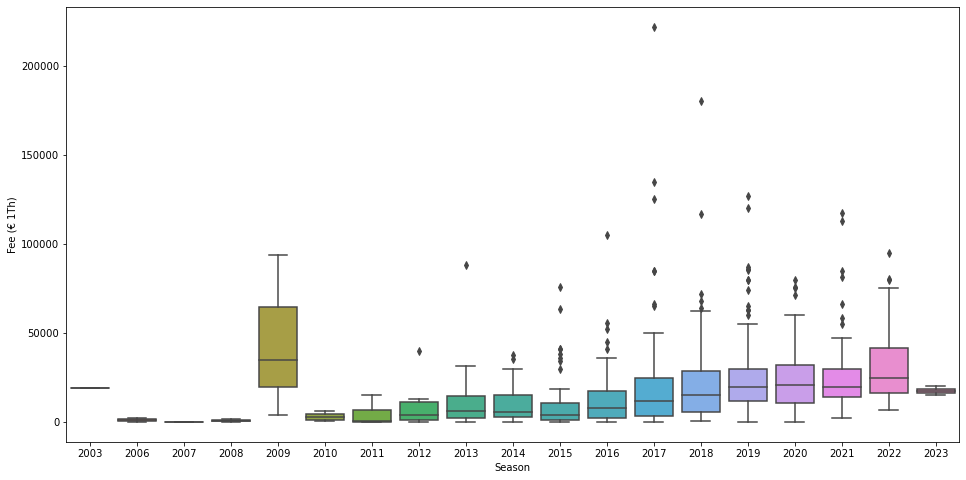

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.boxplot(x=fee['Season'], y=fee['Fee (€ 1Th)'])
plt.show()

boxplot의 중앙값의 변화를 보면, 해가 지날수록 점점 증가하는 경향을 보인다.

따라서, 시간이 지날수록 이적료의 평균이 증가한다는 가설은 검증되었다!


하지만, 2009년의 경우 유달리 박스가 튀는데 이 원인은 해당년도 데이터를 보면 알 수 있다.

In [13]:
fee.loc[fee['Season'] == 2009]

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
176,2009,Jan Oblak,Goalkeeper,16,4000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
370,2009,Karim Benzema,Centre-Forward,21,35000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
373,2009,Cristiano Ronaldo,Centre-Forward,24,94000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


3건의 데이터가 전부인데, 그 와중에 당대 슈퍼스타 호날두와 현재 발롱도르 수상 유력자인 벤제마의 레알마드리드 이적이 2건이나 있었기 때문에 값이 튄다고 볼 수 있다.

즉, 2009년 데이터는 예외로 봐야함을 알 수 있다.

### Goal vs Fee

> 골을 많이 넣는 선수일수록 이적료가 비쌀 것이다.

골을 많이 넣는 선수들은 인기가 많기 마련이다.
그렇기 때문에 이 가설이 진짜인지 goal과 fee의 boxplot을 보고 경향성을 파악해보도록 하자.

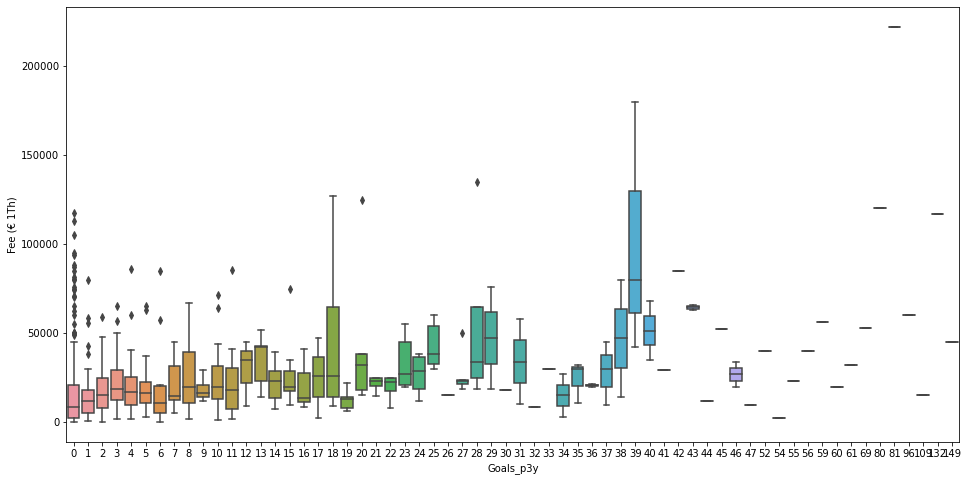

In [20]:
plt.figure(figsize=(16,8))
sns.lineplot(x=fee['Goals_p3y'], y=fee['Fee (€ 1Th)'])
plt.show()

약간의 경향성을 띄지만, 군데군데 Outlier들이 너무 많기 때문에 이것만 가지고는 조금 부족한 느낌이 든다.

#### 그렇다면, 공격수의 경우는 어떨까?

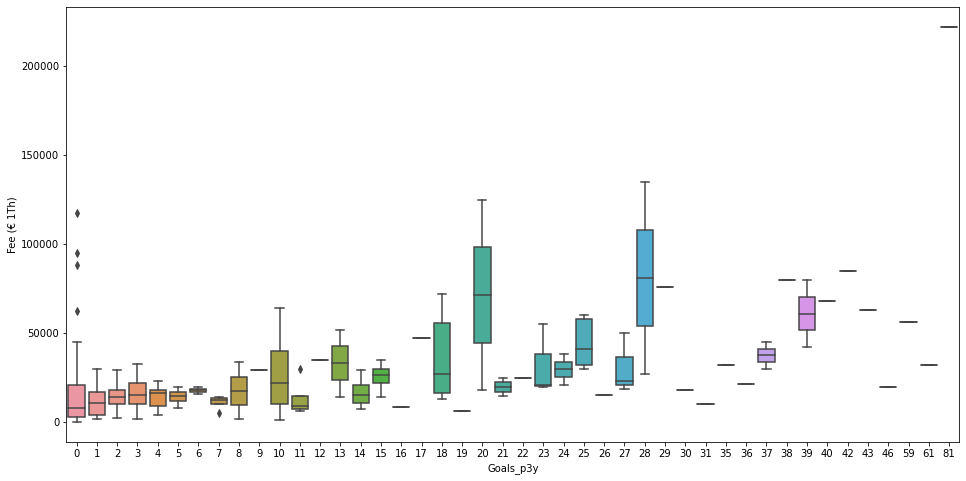

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x=FW_fee['Goals_p3y'], y=FW_fee['Fee (€ 1Th)'])
plt.show()

전 포지션 비교에 비해서는 비교적 확실한 경향성을 보이게 된다.

> 공격수는 비교적 골과 이적료의 상관관계가 뚜렷하다.

라는 결론을 내릴 수 있겠다!

(단, 윙어의 경우 골보다는 어시스트에 치중한 월드클래스 선수들도 존재하는 만큼 Outlier들은 여전히 존재한다고 추측된다.)

### Assist vs Fee

> 어시스트를 많이 하는 미드필더일수록 이적료가 비쌀 것이다.

어시스트를 많이 하는 미드필더들은 인기가 많기 마련이다.
그렇기 때문에 이 가설이 진짜인지 assist와 fee의 boxplot을 보고 경향성을 파악해보도록 하자.

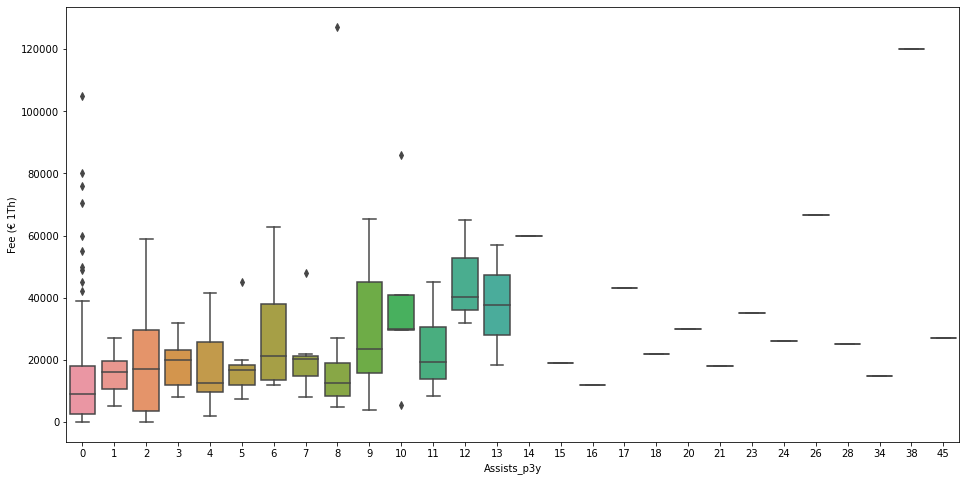

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(x=MF_fee['Assists_p3y'], y=MF_fee['Fee (€ 1Th)'])
plt.show()

골과의 비교보다는 비교적 확실한 경향성을 보인다.

따라서,

> 미드필더는 어시스트를 많이 할수록 높은 이적료가 발생한다.

라는 결론을 내릴 수 있겠다!

### Age vs Fee

> 나이가 어릴수록 포텐셜을 감안하여 이적료가 더 높을 것이다.

요즘 이적시장을 보면, 어린 유망주를 거액의 이적료를 들여 데려오는 경우가 꽤 많다.

예를 들어, 레알마드리드의 **비니시우스 주니오르/호드리구/추아메니**, 도르트문트의 **주드 벨링엄**, 맨시티의 **엘링 홀란드**, 리버풀의 **다르윈 누녜스** 등이 있다.

최근 이적시장의 키워드가 '젊은 유망주 비싸게 모셔오기'인 만큼 나이가 어릴수록 높은 이적료가 책정된다.

반면에 나이가 많은 경우, 뛸 수 있는 나이가 별로 남지 않았기 때문에 그만큼 이적료가 비싸지 않고, 자유계약으로 무료로 가는 경우가 요즘 비일비재하다.

그렇기 때문에 위 가설을 세우게 되었고, 실제 데이터를 통해 검증해보고자 그래프를 그려보게 되었다.

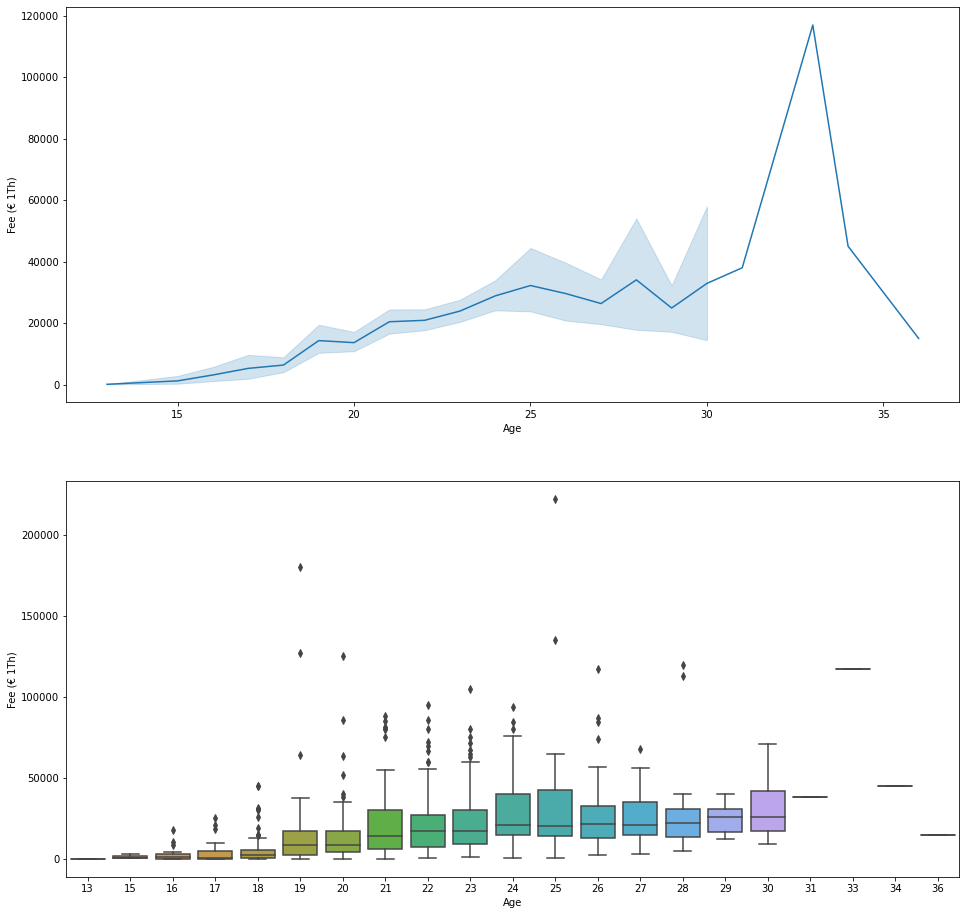

In [34]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.lineplot(x=fee['Age'], y=fee['Fee (€ 1Th)'])
plt.subplot(2,1,2)
sns.boxplot(x=fee['Age'], y=fee['Fee (€ 1Th)'])
plt.show()

> 나이가 많을수록 이적료가 오히려 비싸다.

가설을 완벽하게 반박당했다.

오히려 나이가 많은 선수의 이적일수록 이적료가 비싼 경향을 보인다.

특히, 33살의 케이스가 유독 튀는데 어떤 이적인지 살펴보면,

In [36]:
fee.loc[fee['Age'] == 33]

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
372,2018,Cristiano Ronaldo,Centre-Forward,33,117000,41,8,3,0,40,...,1.43,6.29,81.49,1.46,137,12126,132,36,13,0


바로 호날두의 유벤투스 이적이었다.

호날두는 현존 최고의 선수 중 한 명이기 때문에 이런 일이 발생한 것이다.

**물론, 이 Outlier를 배제하더라도 나이가 적을수록 이적료가 비싸다는 가정은 전혀 맞지 않음을 알 수 있었다.**

## 다중공선성 확인

스텟들이 너무 많기 때문에 시즌, 나이, 골, 어시스트, 패스, 공중볼경합승률, 출전수, 뛴시간, 경고 정도로 테이블을 정리한 후 분석을 진행했다.

In [81]:
df = fee.iloc[:, [3,4,16,17,18,19,20,21,22]]
df

,Age,Fee (€ 1Th),PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y
0,19,180000,79.26,0.27,58,5189,39,21,6
1,22,60000,70.38,1.28,86,7779,96,19,10
2,19,20000,68.98,0.80,4,507,2,1,2
3,18,8000,68.90,0.40,3,383,2,1,2
4,16,100,0.00,0.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
837,28,8000,56.87,0.36,26,2370,0,0,1
838,26,2500,71.47,0.27,30,2389,0,0,3
839,22,1200,0.00,0.00,0,0,0,0,0
840,24,15000,0.00,0.00,0,0,0,0,0


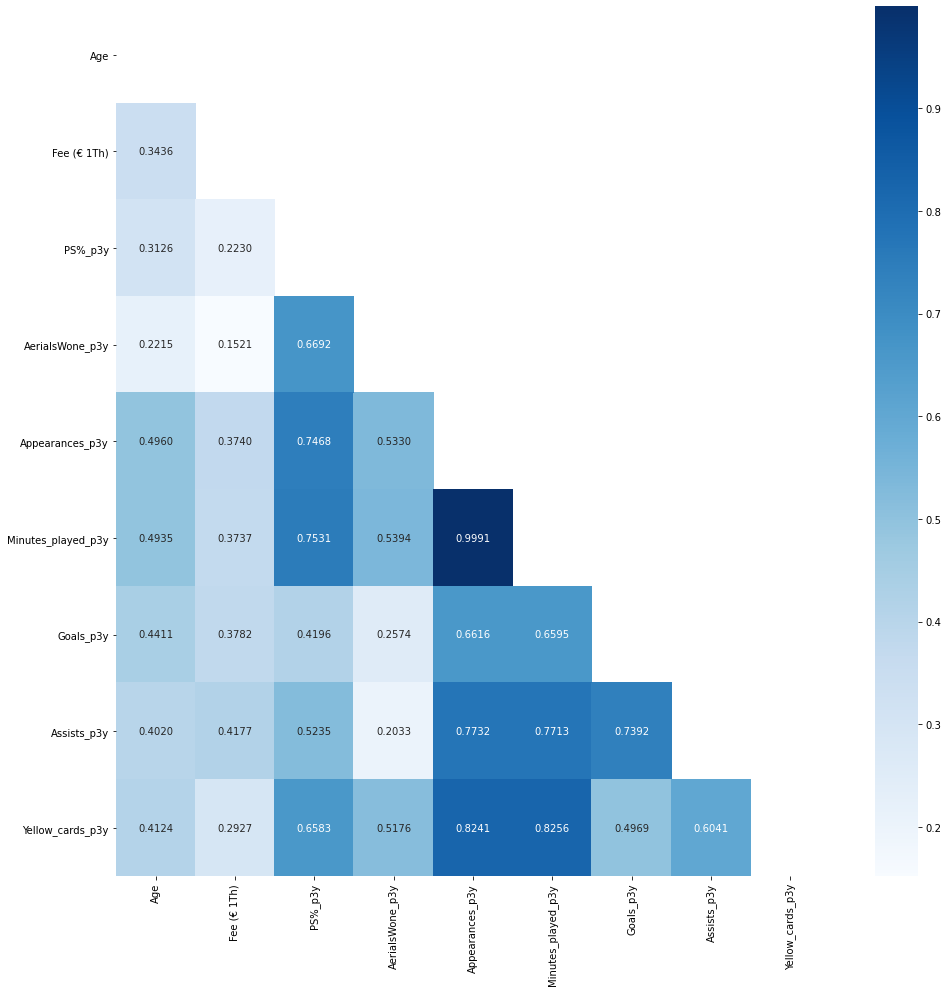

In [82]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 16))
sns.heatmap(data=corr, mask=mask, square=False, cmap='Blues', annot=True, fmt='.4f')
plt.show()

유달리 눈에 띄는 다중공선성이 있었다.

그것은 바로 일부러 넣은 **출전경기수**와 **출전시간**이었다.

둘은 사실상 거의 동일한 지표다.

상관계수 히트맵을 통해 확실하게 확인할 수 있게 되었다.

그 외에도 꽤나 상관계수가 높은 변수 조합이 있었다.

- (출전경기, 도움)
- (출전경기, 경고)
- (출전경기, 패스성공률)
- **(골, 도움)**

주목해볼만한 것은 바로 '골'과 '도움'이 꽤나 높은 양의 상관관계를 보이고 있었다는 점이다.

이것은 두가지 해석이 가능하다.

>1. 골 잘넣는 선수가 도움도 잘하는 것이다.
2. 대체로 공격수들이 골을 만들어 가기 때문에 도움도 많이 기록하게 되는 것이다.

뭐가 어찌 되었던 '골+도움'이라는 공격포인트로 묶어서 공격의 영향력을 비교하려는 요즘 축구계의 추세가 데이터로 봤을 때 꽤나 괜찮은 시도라는 사실을 알 수 있었다.

## 이적료와 스탯간의 상관계수 분석

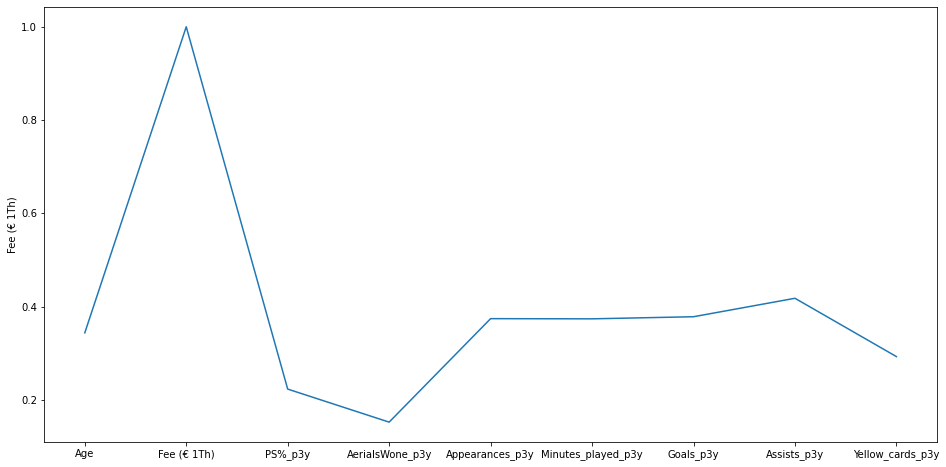

In [90]:
corr_fee = corr.iloc[:,1]
plt.figure(figsize=(16,8))
sns.lineplot(data=corr_fee)
plt.show()

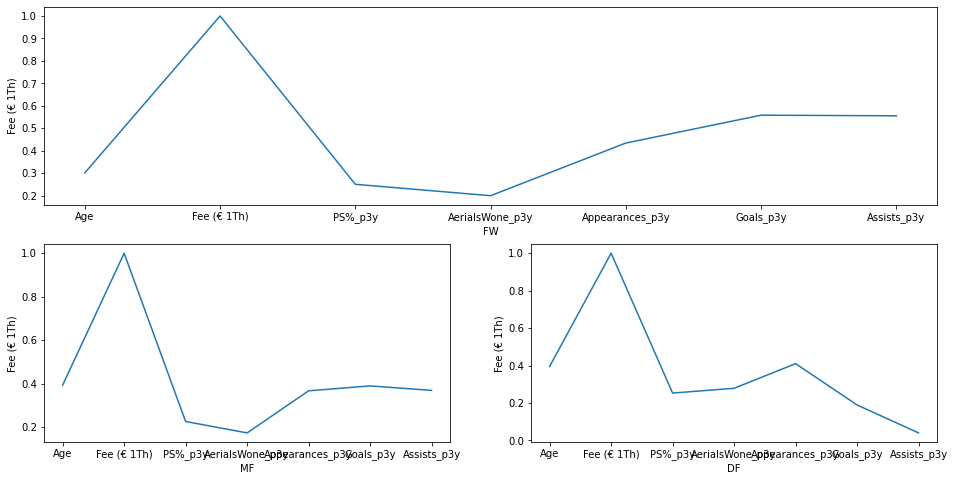

In [96]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
FW_df = FW_fee.iloc[:, [2, 3, 4, 16, 17, 18, 20, 21]]
FW_corr_fee = FW_df.corr().iloc[:,1]
sns.lineplot(data=FW_corr_fee)
plt.xlabel("FW")

plt.subplot(2, 2, 3)
MF_df = MF_fee.iloc[:, [2, 3, 4, 16, 17, 18, 20, 21]]
MF_corr_fee = MF_df.corr().iloc[:,1]
sns.lineplot(data=MF_corr_fee)
plt.xlabel("MF")

plt.subplot(2, 2, 4)
DF_df = DF_fee.iloc[:, [2, 3, 4, 16, 17, 18, 20, 21]]
DF_corr_fee = DF_df.corr().iloc[:,1]
sns.lineplot(data=DF_corr_fee)
plt.xlabel("DF")

plt.show()

### 공격수

> 골, 도움이 이적료와 상관계수가 가장 큼

### 미드필더

> 나이, 출전경기수, 골, 도움 모두 비슷한 상관관계를 보임


### 수비수

> 나이, 출전경기수가 가장 상관계수가 큼.<br>
특이사항은 타 포지션에 비해 공중볼경합승률의 상관계수가 다소 높은 편.

## Pairplot 분석

In [54]:
FW_fee['Position'] = ["FW" for i in range(len(FW_fee))]
MF_fee['Position'] = ["MF" for i in range(len(MF_fee))]
DF_fee['Position'] = ["DF" for i in range(len(DF_fee))]
GK_fee['Position'] = ["GK" for i in range(len(GK_fee))]

In [55]:
fee_pos_modify = pd.concat([FW_fee, MF_fee, DF_fee, GK_fee], ignore_index=True)
fee_pos_modify

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
0,2018,Vinicius Junior,FW,18,45000,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
1,2017,Mohamed Salah,FW,25,42000,17,12,2,0,33,...,0.29,2.33,82.48,0.25,90,7879,39,22,4,1
2,2016,Mohamed Salah,FW,24,15000,15,6,1,1,38,...,0.18,2.15,82.84,0.21,69,6052,26,11,3,1
3,2013,Mohamed Salah,FW,21,16500,2,3,0,0,10,...,0.10,1.80,78.90,0.10,10,948,2,3,0,0
4,2012,Mohamed Salah,FW,20,2500,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2020,Illan Meslier,GK,20,6500,0,0,0,0,10,...,0.70,0.00,74.70,0.70,10,900,0,0,0,0
708,2017,Jordan Pickford,GK,23,28500,0,0,0,0,29,...,0.40,0.00,40.73,0.58,55,4891,0,0,2,1
709,2021,José Sá,GK,28,8000,0,0,0,0,10,...,0.00,0.00,56.87,0.36,26,2370,0,0,1,0
710,2019,José Sá,GK,26,2500,0,0,0,0,7,...,0.10,0.00,71.47,0.27,30,2389,0,0,3,1


In [62]:
df_new = fee_pos_modify.iloc[:, [2,3,4,16,17,18,20,21]]
df_new

,Position,Age,Fee (€ 1Th),PS%_p3y,AerialsWone_p3y,Appearances_p3y,Goals_p3y,Assists_p3y
0,FW,18,45000,0.00,0.00,0,0,0
1,FW,25,42000,82.48,0.25,90,39,22
2,FW,24,15000,82.84,0.21,69,26,11
3,FW,21,16500,78.90,0.10,10,2,3
4,FW,20,2500,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...
707,GK,20,6500,74.70,0.70,10,0,0
708,GK,23,28500,40.73,0.58,55,0,0
709,GK,28,8000,56.87,0.36,26,0,0
710,GK,26,2500,71.47,0.27,30,0,0


<Figure size 1152x1152 with 0 Axes>

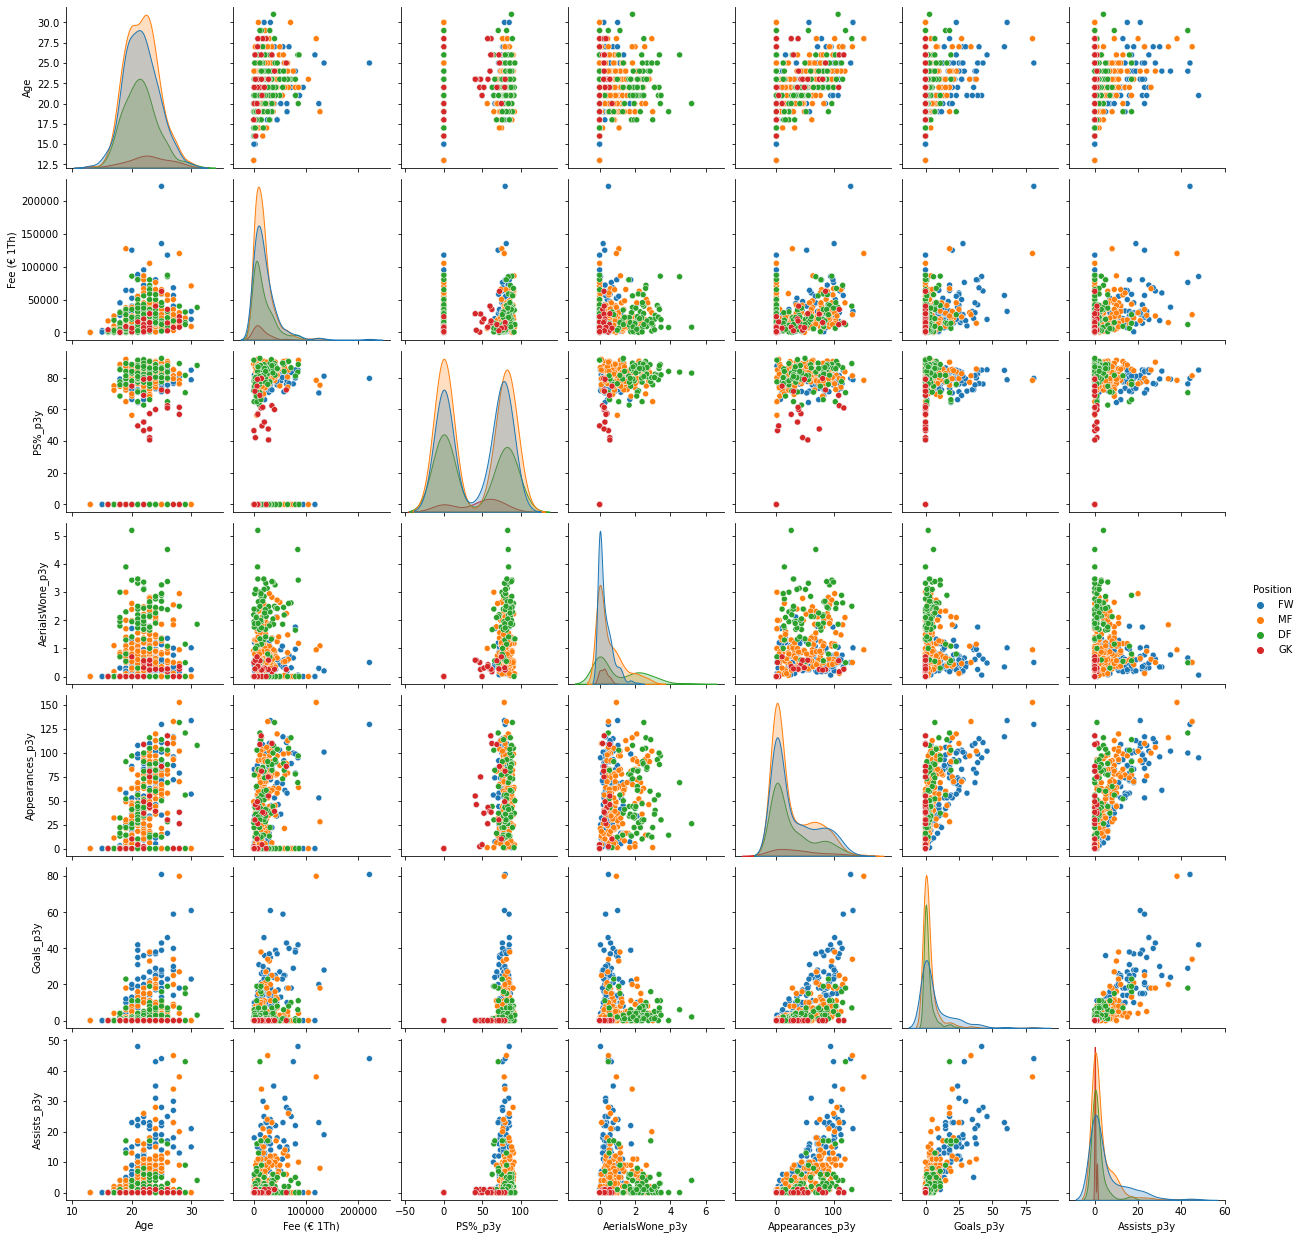

In [63]:
plt.figure(figsize=(16,16))
sns.pairplot(data=df_new, hue="Position")
plt.show()

- 골, 도움 쪽에서 확실히 Grouping된 모습 확인 가능!
- 포지션별로 군집분석 충분히 가능할 것으로 예상